     nflId height  weight   birthDate             collegeName position  \
0  2539334     72     190  1990-09-10              Washington       CB   
1  2539653     70     186  1988-11-01  Southeastern Louisiana       CB   
2  2543850     69     186  1991-12-18                  Purdue       SS   
3  2555162     73     227  1994-11-04         Louisiana State      MLB   
4  2555255     75     232  1993-07-01               Minnesota      OLB   

          displayName  
0     Desmond Trufant  
1       Robert Alford  
2       Ricardo Allen  
3         Deion Jones  
4  De'Vondre Campbell  


C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2990088664.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans.fit_predict(X_scaled)
C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2990088664.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['pca1'] = X_pca[:, 0]
C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2990088664.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

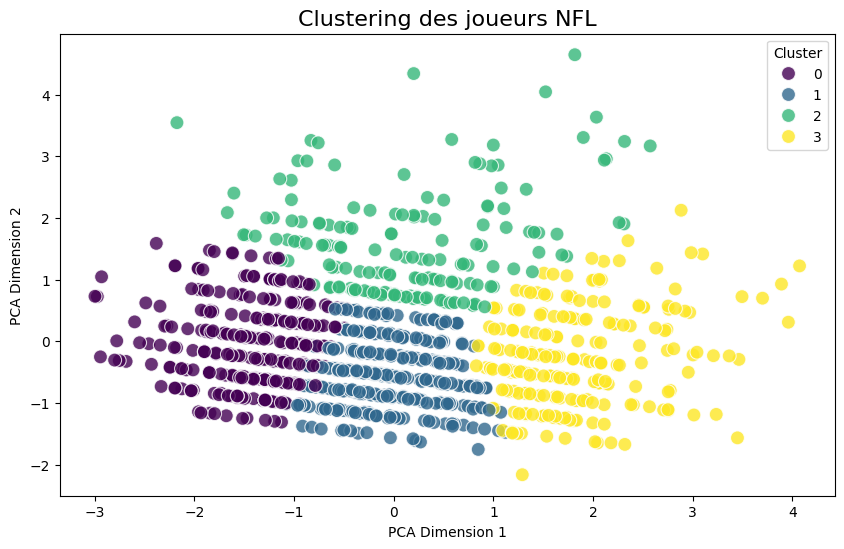

TypeError: agg function failed [how->mean,dtype->object]

In [6]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime  # Ajout de l'importation de datetime

# Charger le fichier CSV (remplace le chemin par celui de ton fichier)
df_players = pd.read_csv('data/players.csv')


# Vérifier les premières lignes du dataset
print(df_players.head())

# Convertir la colonne 'birthDate' en datetime si ce n'est pas déjà fait
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce')

# Calculer l'âge à partir de la date de naissance
df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Nettoyer le dataset : enlever les lignes avec des valeurs manquantes dans les colonnes nécessaires
df_cluster = df_players.dropna(subset=['height', 'weight', 'age'])

# Sélectionner les caractéristiques pour le clustering (taille, poids, âge)
X = df_cluster[['height', 'weight', 'age']]

# Normaliser les données pour que chaque caractéristique ait une moyenne de 0 et une variance de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'algorithme de KMeans (choisir un nombre de clusters, ici 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Réduction de la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

# Visualiser les clusters avec un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100, alpha=0.8
)
plt.title('Clustering des joueurs NFL', fontsize=16)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Analyser les caractéristiques moyennes des joueurs dans chaque cluster
# Sélectionner uniquement les colonnes numériques pour éviter les erreurs
numeric_columns = df_cluster[['height', 'weight', 'age']]
cluster_analysis = df_cluster.groupby('cluster')[numeric_columns.columns].mean()

print(cluster_analysis)


     nflId height  weight   birthDate             collegeName position  \
0  2539334     72     190  1990-09-10              Washington       CB   
1  2539653     70     186  1988-11-01  Southeastern Louisiana       CB   
2  2543850     69     186  1991-12-18                  Purdue       SS   
3  2555162     73     227  1994-11-04         Louisiana State      MLB   
4  2555255     75     232  1993-07-01               Minnesota      OLB   

          displayName  
0     Desmond Trufant  
1       Robert Alford  
2       Ricardo Allen  
3         Deion Jones  
4  De'Vondre Campbell  


C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2335507442.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)
C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2335507442.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.loc[:, 'pca1'] = X_pca[:, 0]
C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\2335507442.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

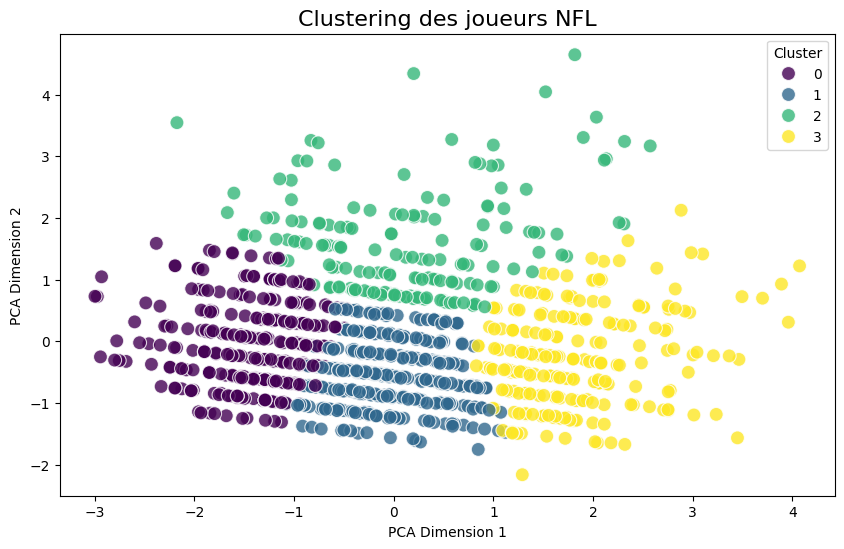

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime  # Ajout de l'importation de datetime

# Charger le fichier CSV (remplace le chemin par celui de ton fichier)
df_players = pd.read_csv('data/players.csv')

# Vérifier les premières lignes du dataset
print(df_players.head())

# Convertir la colonne 'birthDate' en datetime si ce n'est pas déjà fait
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce')

# Calculer l'âge à partir de la date de naissance
df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Nettoyer le dataset : enlever les lignes avec des valeurs manquantes dans les colonnes nécessaires
df_cluster = df_players.dropna(subset=['height', 'weight', 'age'])

# Sélectionner les caractéristiques pour le clustering (taille, poids, âge)
X = df_cluster[['height', 'weight', 'age']]

# Convertir les colonnes en types numériques si nécessaire
X = X.apply(pd.to_numeric, errors='coerce')

# Normaliser les données pour que chaque caractéristique ait une moyenne de 0 et une variance de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'algorithme de KMeans (choisir un nombre de clusters, ici 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)

# Réduction de la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster.loc[:, 'pca1'] = X_pca[:, 0]
df_cluster.loc[:, 'pca2'] = X_pca[:, 1]

# Visualiser les clusters avec un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100, alpha=0.8
)
plt.title('Clustering des joueurs NFL', fontsize=16)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Analyser les caractéristiques moyennes des joueurs dans chaque cluster
# Sélectionner uniquement les colonnes numériques pour éviter les erreurs
numeric_columns = df_cluster[['height', 'weight', 'age']]
cluster_analysis = df_cluster.groupby('cluster')[numeric_columns.columns].mean()

print(cluster_analysis)


In [8]:
df_players.dtypes

nflId                   int64
height                 object
weight                  int64
birthDate      datetime64[ns]
collegeName            object
position               object
displayName            object
age                   float64
dtype: object

In [15]:
import pandas as pd

# Charger tes données (en supposant que tu as déjà un DataFrame nommé df_players)

# Convertir la colonne 'height' en type float (gérer les erreurs de conversion si nécessaire)
df_players['height'] = pd.to_numeric(df_players['height'], errors='coerce')

# Vérifier les types après conversion
print(df_players.dtypes)

# Tu peux aussi vérifier s'il y a des valeurs manquantes après la conversion
print(df_players.isnull().sum())


nflId                   int64
height                float64
weight                  int64
birthDate      datetime64[ns]
collegeName            object
position               object
displayName            object
age                   float64
dtype: object
nflId            0
height           0
weight           0
birthDate      242
collegeName      0
position         0
displayName      0
age            242
dtype: int64


In [12]:
def convert_height_to_cm(height):
    try:
        # Si le format est "6-2" (pieds-pouces)
        if '-' in str(height):
            feet, inches = map(int, height.split('-'))
            total_inches = feet * 12 + inches
        else:
            # Si le format est déjà en pouces
            total_inches = float(height)
        
        # Convertir les pouces en centimètres
        return total_inches * 2.54
    except:
        return None  # Gérer les valeurs incorrectes

# Appliquer la fonction à la colonne height
df_players['height'] = df_players['height'].apply(convert_height_to_cm)

# Vérifier le résultat
print(df_players['height'].head())

0    182.88
1    177.80
2    175.26
3    185.42
4    190.50
Name: height, dtype: float64


In [14]:
# Convertir la colonne birthDate en format datetime uniforme
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce', infer_datetime_format=True)

# Vérifier les résultats
print(df_players['birthDate'].head())


0   1990-09-10
1   1988-11-01
2   1991-12-18
3   1994-11-04
4   1993-07-01
Name: birthDate, dtype: datetime64[ns]


C:\Users\Charles\AppData\Local\Temp\ipykernel_23464\3974232657.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce', infer_datetime_format=True)
